# Data generation

In [1]:
import torch

dataset_len = 400
x_points = torch.FloatTensor(dataset_len).uniform_(1.0, 10.0)
y_points = torch.exp(-x_points)

print("shape x = ",x_points.shape)
print("shape y = ",y_points.shape)


shape x =  torch.Size([400])
shape y =  torch.Size([400])


# Data plot

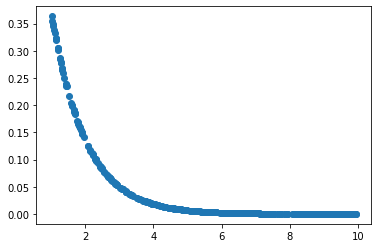

In [2]:
import matplotlib.pyplot as plt

plt.scatter(x_points, y_points)
plt.show()

# Data split (train and test)

In [3]:
dataset = torch.stack((x_points, y_points), -1)

print("dataset shape = ",dataset.shape)

train_data,validate_data = torch.utils.data.random_split(dataset, [int(dataset_len*0.75),int(dataset_len*0.25)])

print("train dataset shape = ",len(train_data))

print("validation dataset shape = ",len(validate_data))


dataset shape =  torch.Size([400, 2])
train dataset shape =  300
validation dataset shape =  100


# Model

In [4]:
learning_rate = 0.001

class LinearRegressionModel(torch.nn.Module):
    def __init__(self,neuron):
        super(LinearRegressionModel, self).__init__()
        self.linear1 = torch.nn.Linear(1, neuron)  # One in and one out
        self.sig = torch.nn.Sigmoid()
        self.linear2 = torch.nn.Linear(neuron, 1)  # One in and one out
 
    def forward(self, x):
        x = self.linear1(x)
        x= self.sig(x)
        x = self.linear2(x)
        return x

# Accuracy check function

In [5]:
from sklearn.metrics import r2_score

def check_accuracy(loader, model):

    y_predict = []
    y_orig = []
    model.eval()
    with torch.no_grad():

        for x, y in loader:
            x=x.unsqueeze(dim=0)
            y=y.unsqueeze(dim=0)
            scores = model(x)
            y_predict.append(scores.detach().numpy())
            y_orig.append(y.detach().numpy())

    model.train()
    
    return r2_score(y_orig, y_predict)


# Model train

In [6]:
from tqdm import tqdm

num_epoch = 20

acuuracy_neuron_no = []
train_acuuracy_score = []
test_acuuracy_score = []

loop = tqdm(range(20), total=20, leave=False)

for neurons in loop:
    model = LinearRegressionModel((neurons+1)*2)

    criterion = torch.nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

    for epoch in range(num_epoch):

        for batch_idx, (data, targets) in enumerate(train_data):
        # forward
            data = data.unsqueeze(dim=0)
            targets = targets.unsqueeze(dim=0)
            
            scores = model(data)
            loss = criterion(scores, targets)

            optimizer.zero_grad()
            loss.backward()

            optimizer.step()
#             loop.set_description(f"neurons [{(neurons+1)*2}/{40}] Epoch [{epoch + 1}/{num_epoch}]")
#             loop.set_postfix(loss=loss.item())
      
    train_accuracy = check_accuracy(train_data, model)
    test_accuracy = check_accuracy(validate_data, model)
    
    acuuracy_neuron_no.append((neurons+1)*2)
    train_acuuracy_score.append(train_accuracy)
    test_acuuracy_score.append(test_accuracy)
    

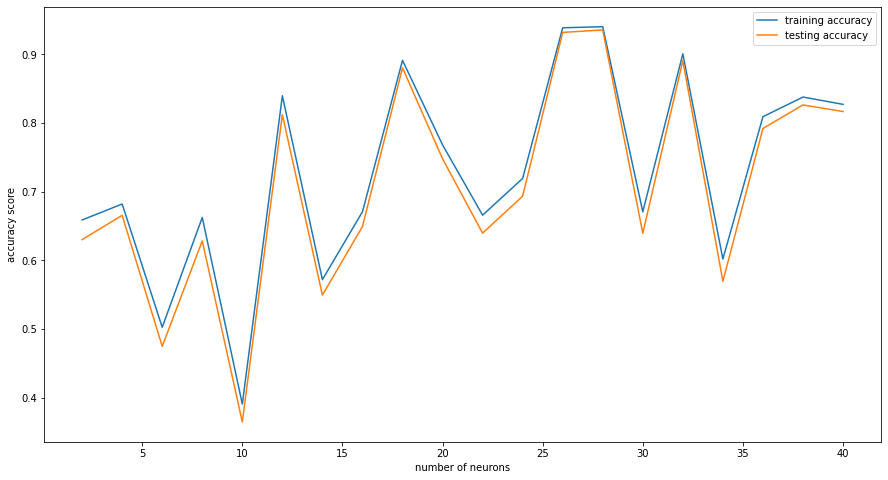

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
 
plt.plot(acuuracy_neuron_no, train_acuuracy_score, label = "training accuracy")
 
plt.plot(acuuracy_neuron_no, test_acuuracy_score, label = "testing accuracy")
 
plt.xlabel('number of neurons')

plt.ylabel('accuracy score')

 
# show a legend on the plot
plt.legend()
 
# function to show the plot
plt.show()